In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
## Data Cleaning

In [39]:
df = pd.read_csv('../model/msl_4.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.668133,0.575990,-1.245456e-06,0.559841,0.477058,-0.163110,0.502512,0.330015,-0.281766,0.486979,...,0.341133,0.743112,-0.421287,0.379127,0.721945,-0.416987,0.505915,0.707158,-0.401877,A
1,0.775226,0.652336,-4.915925e-07,0.635080,0.496825,-0.127996,0.477498,0.351564,-0.283799,0.460231,...,0.481879,0.914799,-0.469226,0.521024,0.875066,-0.457533,0.616052,0.824982,-0.461446,A
2,0.284280,0.718999,-9.384507e-07,0.366839,0.561318,-0.038444,0.524805,0.400856,-0.087301,0.592993,...,0.651855,0.832896,-0.285252,0.591926,0.811353,-0.252740,0.510428,0.784820,-0.236421,A
3,0.515338,0.678122,-1.622071e-06,0.460059,0.536621,-0.153407,0.480938,0.366841,-0.254906,0.531223,...,0.413181,0.827054,-0.385353,0.402945,0.799876,-0.382126,0.467820,0.774531,-0.364127,A
4,0.410791,0.818512,-4.476685e-07,0.443488,0.578370,-0.175250,0.462646,0.350566,-0.335886,0.411169,...,0.788371,0.825140,-0.422565,0.736056,0.817047,-0.414728,0.631898,0.842833,-0.409830,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301,0.445015,0.784652,1.162402e-06,0.433808,0.675467,-0.021129,0.389775,0.564036,-0.072053,0.361995,...,0.315979,0.341876,-0.302919,0.418756,0.273966,-0.303546,0.493866,0.249219,-0.291593,H
9302,0.533369,0.793101,-2.227718e-06,0.578185,0.638026,0.106232,0.655826,0.503476,0.125469,0.683890,...,0.659513,0.270566,-0.237783,0.550375,0.206445,-0.236459,0.468267,0.197755,-0.225590,H
9303,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,H
9304,0.620235,0.878997,-2.239169e-06,0.571587,0.679500,0.097740,0.615597,0.540207,0.117163,0.636412,...,0.618336,0.407362,-0.197863,0.516210,0.374304,-0.200964,0.444155,0.378288,-0.197785,H


In [40]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (9306, 64)


In [41]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 379


In [42]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [43]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.668133,0.575990,-1.245456e-06,0.559841,0.477058,-0.163110,0.502512,0.330015,-0.281766,0.486979,...,0.341133,0.743112,-0.421287,0.379127,0.721945,-0.416987,0.505915,0.707158,-0.401877,A
1,0.775226,0.652336,-4.915925e-07,0.635080,0.496825,-0.127996,0.477498,0.351564,-0.283799,0.460231,...,0.481879,0.914799,-0.469226,0.521024,0.875066,-0.457533,0.616052,0.824982,-0.461446,A
2,0.284280,0.718999,-9.384507e-07,0.366839,0.561318,-0.038444,0.524805,0.400856,-0.087301,0.592993,...,0.651855,0.832896,-0.285252,0.591926,0.811353,-0.252740,0.510428,0.784820,-0.236421,A
3,0.515338,0.678122,-1.622071e-06,0.460059,0.536621,-0.153407,0.480938,0.366841,-0.254906,0.531223,...,0.413181,0.827054,-0.385353,0.402945,0.799876,-0.382126,0.467820,0.774531,-0.364127,A
4,0.410791,0.818512,-4.476685e-07,0.443488,0.578370,-0.175250,0.462646,0.350566,-0.335886,0.411169,...,0.788371,0.825140,-0.422565,0.736056,0.817047,-0.414728,0.631898,0.842833,-0.409830,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9300,0.393517,0.899451,6.069165e-07,0.419059,0.674184,0.056388,0.344390,0.521402,0.052530,0.315181,...,0.324488,0.398070,-0.229341,0.457643,0.359642,-0.223927,0.549845,0.357939,-0.207999,H
9301,0.445015,0.784652,1.162402e-06,0.433808,0.675467,-0.021129,0.389775,0.564036,-0.072053,0.361995,...,0.315979,0.341876,-0.302919,0.418756,0.273966,-0.303546,0.493866,0.249219,-0.291593,H
9302,0.533369,0.793101,-2.227718e-06,0.578185,0.638026,0.106232,0.655826,0.503476,0.125469,0.683890,...,0.659513,0.270566,-0.237783,0.550375,0.206445,-0.236459,0.468267,0.197755,-0.225590,H
9304,0.620235,0.878997,-2.239169e-06,0.571587,0.679500,0.097740,0.615597,0.540207,0.117163,0.636412,...,0.618336,0.407362,-0.197863,0.516210,0.374304,-0.200964,0.444155,0.378288,-0.197785,H


In [44]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (8927, 64)


## Data Preparation

In [45]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (8927, 63)
Labels shape = (8927,)


## Data Split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

In [47]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [48]:
# print(x_train,y_train)
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [49]:
print("Training score =", svm.score(x_train, y_train))

Training score = 1.0


In [50]:
y_pred = svm.predict(x_test)

In [51]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 1.0


## Visualization

In [52]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [53]:
f1, recall, precision

(1.0, 1.0, 1.0)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

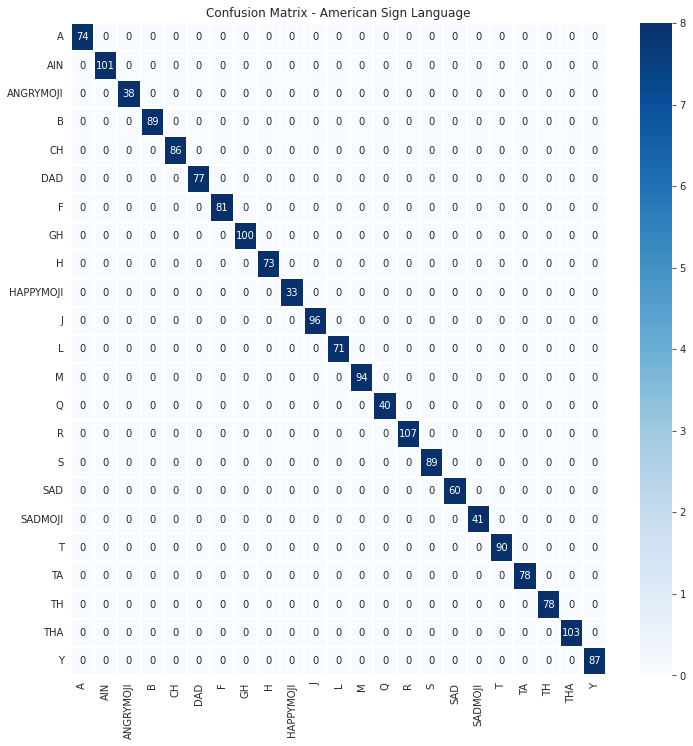

In [54]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [55]:
maping.figure.savefig("msl_output_4.png")

In [56]:
import joblib

In [57]:

joblib.dump(svm, "../model/msl_model_4.pkl")

['../model/msl_model_4.pkl']